# 1장. 데이터 샘플링
### 1절 | 데이터 샘플링
### 2절 | R을 이용한 표본 추출
#### 1. 단순 임의 추출

> Q) iris 데이터로 분석을 진행하기 위해 전체 데이터의 7:3의 비율로 train, test 추출한 뒤 새로운 변수에 저장해보자.<br> 
(데이터 추출 방법은 단순 임의 비복원 추출을 이용한다.)

In [66]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()

In [67]:
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [68]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [12]:
X = df.drop(['target'],axis = 1)
Y = df['target']

In [16]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_Y, test_Y = train_test_split(X,Y,random_state = 20,
                                                   test_size=0.3 #기본 0.25
                                                   )

In [17]:
train_X.shape, test_X.shape # 원본 X는 (150, 4)

((105, 4), (45, 4))

#### 2. 층화 임의 추출

> Q) iris 데이터에서 Species가 
- setosa 20개, versicolor 15개, versinica 15개씩 단순 임의 추출을 사용해 추출해보자.

In [24]:
df_0 = df.loc[df.target == 0].sample(n=20) # setosa 20개 랜덤추출
df_1 = df.loc[df.target == 1].sample(n=15) # versicolor 15개 랜덤추출
df_2 = df.loc[df.target == 2].sample(n=15) # versinica 15개 랜덤추출

df_strata = pd.concat([df_0,df_1,df_2])

In [34]:
df_strata.target.value_counts()

0    20
1    15
2    15
Name: target, dtype: int64

In [35]:
df_0.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
5,5.4,3.9,1.7,0.4,0
35,5.0,3.2,1.2,0.2,0
49,5.0,3.3,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0
45,4.8,3.0,1.4,0.3,0


In [59]:
### 도수분포표 그리기
bar = df_strata.target.value_counts().to_frame()
bar

,target
0,20
1,15
2,15


<BarContainer object of 3 artists>

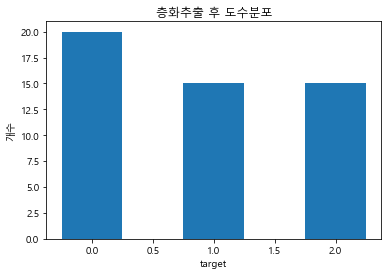

In [56]:
# 그래프 기본 설정
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 20
plt.rcParams["figure.figsize"] = (10, 8)

plt.title("층화추출 후 도수분포")
plt.xlabel("target")
plt.ylabel("개수")
plt.bar(bar.index, bar['target'], width = 0.5)

# 2장. T-검정(T-Test)
### 1절 | 일표본 T-검정(One Sample T-Test)

[data set download](https://r-data.pmagunia.com/dash)

- Q) MASS패키지의 cats ; 고양이들의 성별(Sex 변수), 몸무게(Bwt 변수), 심장의 무게(Hwt 변수) 
- cats 데이터에서 고양이들의 평균몸무게가 2.6kg인지 아닌지에 대한 통계적 검정을 수행하고, 결과를 해석해보자.

In [111]:
cats = pd.read_csv('./data/cats.csv')
cats.head()

,Sex,Bwt,Hwt
0,F,2.0,7.0
1,F,2.0,7.4
2,F,2.0,9.5
3,F,2.1,7.2
4,F,2.1,7.3


In [71]:
# 1) Bwt(고양이 몸무게) 변수에 대한 정규성 검정 수행
shapiro(cats.Bwt) 

(0.9518786668777466, 6.730248423991725e-05)

- 정규성 만족
    - t.test
- 정규성 만족 X
    - wilcox.test

- shapiro의 H0 : 정규성 만족한다.  
- p-value 매우 작음 
    - -> H0 기각 -> "정규분포를 따르지 않음"

In [86]:
# 2) cats 데이터에 대한 일표본 T-검정 수행
from scipy.stats import wilcoxon
cats_ttest = wilcoxon(cats.Bwt-2.6)
cats_ttest # H0 기각 ; 고양이들의 평균무게는 2.6이 아니다.

WilcoxonResult(statistic=3573.0, pvalue=0.02524520294814093)

In [94]:
wilcoxon(cats.Bwt-2.6, alternative="greater") #H0기각 ; 2.6보다 작다!

WilcoxonResult(statistic=5607.0, pvalue=0.012622601474070466)

In [95]:
wilcoxon(cats.Bwt-2.6, alternative="less") #H0 채택 ; 2.6보다 작다!

WilcoxonResult(statistic=5607.0, pvalue=0.9873773985259295)

### 2절 | 대응표본 T-검정(Paired Sample T-Test)
#### (동일 표본. 처리 전후의 평균차이 비교)

Q) 10명의 환자를 대상으로 수면영양제를 복용하기 전과 후의 수면시간을 측정하여 영양제의 효과가 있는지를 판단하고자 한다.<br> 
- 영양제 복용 전과 후의 평균 수면시간에 차이가 있는지를 알아보는데, 
- 단측검정을 수행하여 영양제 복용 후에 수면시간이 더 늘어났는지를 검정해보자. 
- 수면영양제를 복용하기 전과 후의 수면시간은 아래에 제시된 바와 같다. 
- (표본이 정규성을 만족한다는 가정 하에 단측검정 수행, 유의수준 = 0.05)
    - H0 : 수면시간 차이 없다
    - H1 : 영양제 복용 후 수면시간이 늘어났다.

In [96]:
df = pd.DataFrame({'before':[7, 3, 4, 5, 2, 1, 6, 6, 5, 4], 'after' : [8, 4, 5, 6, 2, 3, 6, 8, 6, 5]} ) 
df

,before,after
0,7,8
1,3,4
2,4,5
3,5,6
4,2,2
5,1,3
6,6,6
7,6,8
8,5,6
9,4,5


In [101]:
before = [7, 3, 4, 5, 2, 1, 6, 6, 5, 4]
after = [8, 4, 5, 6, 2, 3, 6, 8, 6, 5]

In [102]:
ttest_rel(before, after) # H0 기각 ; 영양제 효과 있음

# mx-my ; 검통 < 0 ; after의 평균이 더 크다! (맞나,,,,,,)

Ttest_relResult(statistic=-4.743416490252569, pvalue=0.001053871257016553)

In [99]:
help(ttest_rel)

Help on function ttest_rel in module scipy.stats.stats:

ttest_rel(a, b, axis=0, nan_policy='propagate')
    Calculate the t-test on TWO RELATED samples of scores, a and b.
    
    This is a two-sided test for the null hypothesis that 2 related or
    repeated samples have identical average (expected) values.
    
    Parameters
    ----------
    a, b : array_like
        The arrays must have the same shape.
    axis : int or None, optional
        Axis along which to compute test. If None, compute over the whole
        arrays, `a`, and `b`.
    nan_policy : {'propagate', 'raise', 'omit'}, optional
        Defines how to handle when input contains nan.
        The following options are available (default is 'propagate'):
    
          * 'propagate': returns nan
          * 'raise': throws an error
          * 'omit': performs the calculations ignoring nan values
    
    Returns
    -------
    statistic : float or array
        t-statistic.
    pvalue : float or array
        Two-

### 3절 | 독립표본 T-검정( Sample T-Test)
#### (서로 다른 표본)

Q) 고양이들의 성별(Sex)에 따른 몸무게(Bwt)의 평균이 통계적으로 다르다고 할 수 있는가?<br>

검정을 수행하기에 앞서 설정할 수 있는 가설은 아래와 같다.
- 귀무가설 : 고양이의 성별에 따른 평균 몸무게에는 통계적으로 유의한 차이가 없다.
- 대립가설 : 고양이의 성별에 따른 평균 몸무게에는 통계적으로 유의한 차이가 있다.

In [122]:
cats_F = cats[cats.Sex=="F"].Bwt
cats_M = cats[cats.Sex=="M"].Bwt

# 1) 등분산 검정
levene(cats_F,cats_M) # 등분산 만족 X

LeveneResult(statistic=19.43101190877999, pvalue=2.0435285255189404e-05)

In [123]:
help(levene) # H0 : 등분산이다.

Help on function levene in module scipy.stats.morestats:

levene(*args, **kwds)
    Perform Levene test for equal variances.
    
    The Levene test tests the null hypothesis that all input samples
    are from populations with equal variances.  Levene's test is an
    alternative to Bartlett's test `bartlett` in the case where
    there are significant deviations from normality.
    
    Parameters
    ----------
    sample1, sample2, ... : array_like
        The sample data, possibly with different lengths. Only one-dimensional
        samples are accepted.
    center : {'mean', 'median', 'trimmed'}, optional
        Which function of the data to use in the test.  The default
        is 'median'.
    proportiontocut : float, optional
        When `center` is 'trimmed', this gives the proportion of data points
        to cut from each end. (See `scipy.stats.trim_mean`.)
        Default is 0.05.
    
    Returns
    -------
    statistic : float
        The test statistic.
    pvalue 

In [124]:
# 2) 등분산성을 만족하지 않는다는 조건 하에 독립 t검정을 수행
ttest_ind(cats_F, cats_M, equal_var = False) 

Ttest_indResult(statistic=-8.70948849909559, pvalue=8.831034455859356e-15)

성별에 따른 몸무게의 차이가 통계적으로 (매우) 유의하다.

# 3장. 교차분석
### 2절 | 적합성 검정

Q) MASS 패키지의 survey 데이터에서 W.Hnd 변수는 설문 응답자가 왼손잡이(Left) 인지 오른손잡이(Right) 인지를 나타낸다. <br><br>
W.Hnd 변수에 대한 분할표를 생성하고, 아래와 같은 가설에 대한 적합도 검정을 수행해보자.
     - 귀무가설 : 전체 응답자 중 왼손잡이의 비율이 20%, 오른손잡이의 비율이 80%이다.
     - 대립가설 : 전체 응답자 중 왼손잡이의 비율이 20%, 오른손잡이의 비율이 80%라고 할 수 없다.


In [3]:
survey = pd.read_csv('./data/survey.csv')
survey.head()

,Sex,Wr.Hnd,NW.Hnd,W.Hnd,Fold,Pulse,Clap,Exer,Smoke,Height,M.I,Age
0,Female,18.5,18.0,Right,R on L,92.0,Left,Some,Never,173.0,Metric,18.250
1,Male,19.5,20.5,Left,R on L,104.0,Left,None,Regul,177.8,Imperial,17.583
2,Male,18.0,13.3,Right,L on R,87.0,Neither,None,Occas,NaN,NaN,16.917
3,Male,18.8,18.9,Right,R on L,NaN,Neither,None,Never,160.0,Metric,20.333
4,Male,20.0,20.0,Right,Neither,35.0,Right,Some,Never,165.0,Metric,23.667


In [23]:
# 1) 분할표
table = survey['W.Hnd'].value_counts().to_frame() ##관측값
table

,W.Hnd
Right,218
Left,18


In [31]:
# 0.8, 0.2인지 검정해야 하니까
table["Exp"] = [survey['W.Hnd'].count()*0.8, survey['W.Hnd'].count()*0.2]  ##기댓값
table

,W.Hnd,Exp
Right,218,188.8
Left,18,47.2


In [35]:
# 2) 적합도 검정
# 관측된 데이터가 예측한 분포를 따르는지 검정
chis = stats.chisquare(table['W.Hnd'],table['Exp'])
chis

Power_divergenceResult(statistic=22.58050847457627, pvalue=2.0151876969887844e-06)

### 3절 | 독립성 검정

Q) MASS 패키지의 survey 데이터에서 
- Exer 변수는 설문 응답자가 얼마나 자주 운동을 하는지에 대해 
    - Freq(자주), Some(약간), None(하지 않음)의 범주로 값을 저장하고 있다. 
- W.Hnd 변수는 설문 응답자가 왼손잡이인지 오른손 잡이인지에 대해 
    - Left(왼손잡이), Right(오른손 잡이)의 두 가지 범주로 값을 가지고 있다.  

주로 사용하는 손과 운동의 빈도가 서로 독립인지를 확인하기 위해 분할표를 생성하고, 독립성 검정을 수행해보자.

- 귀무가설 : W.Hnd(주로 사용하는 손)과 Exer(운동 빈도)는 독립이다.
- 대립가설 : W.Hnd(주로 사용하는 손)과 Exer(운동 빈도)는 독립이 아니다.


In [41]:
cross_table = pd.crosstab(survey['W.Hnd'], survey['Exer'])
cross_table

Exer,Freq,None,Some
W.Hnd,,,
Left,7,3,8
Right,107,21,90


In [56]:
obs = cross_table.values
obs

array([[  7,   3,   8],
       [107,  21,  90]], dtype=int64)

In [57]:
chi2_contingency(obs) # statistics, p-value, df, expected 

(1.2065256705182212,
 0.5470238723125773,
 2,
 array([[  8.69491525,   1.83050847,   7.47457627],
        [105.30508475,  22.16949153,  90.52542373]]))

귀무가설을 기각할 수 없다. (주로 사용하는 손과 운동빈도는 독립이다.)

# 4장. 분산분석 (ANOVA)
### 1절 | 일원배치 분산분석

iris 데이터를 이용하여 종(Species)별로 꽃받침의 폭(Sepal.Width)의 평균이 같은지<br> 혹은 차이가 있는지를 확인하기 위해 일원배치 분산분석을 수행해보자.


- 귀무가설 : Species별로 Sepal.Width 평균의 차이가 없다.
- 대립가설 : Species별로 Sepal.Width 평균의 차이가 있다.

In [70]:
df.groupby(['target'])['sepal width (cm)'].mean() # 종류 별 평균 확인

target
0    3.428
1    2.770
2    2.974
Name: sepal width (cm), dtype: float64

In [79]:
df_0 = df.loc[df.target == 0]['sepal width (cm)'] # setosa
df_1 = df.loc[df.target == 1]['sepal width (cm)'] # versicolor
df_2 = df.loc[df.target == 2]['sepal width (cm)'] # versinica 
f_oneway(df_0,df_1,df_2)

F_onewayResult(statistic=49.160040089612075, pvalue=4.492017133309115e-17)

> 귀무가설을 기각한다. (평균간 차이가 있다)
    - 어느 종류 간 평균차이가 있을까? -> TukeyHSD 사후분석 진행

In [93]:
### 사후분석
# target이 숫자여서,,, 에러나,,
# 범주형으로 바꿔줘야함!!
df['target'] = df['target'].map({0:"setosa", 1:"versicolor", 2:"virginica"})

In [100]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison
hsd = pairwise_tukeyhsd(df['sepal width (cm)'],df['target'], alpha=0.05)
hsd.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
setosa,versicolor,-0.658,0.001,-0.8189,-0.4971,True
setosa,virginica,-0.454,0.001,-0.6149,-0.2931,True
versicolor,virginica,0.204,0.0088,0.0431,0.3649,True


In [103]:
# pairwise_tukeyhsd 말고 MultiComparison 쓸 수도 있음 !
mc = MultiComparison(df['sepal width (cm)'],df['target'])
print(mc.tukeyhsd())

    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
  group1     group2   meandiff p-adj   lower   upper  reject
------------------------------------------------------------
    setosa versicolor   -0.658  0.001 -0.8189 -0.4971   True
    setosa  virginica   -0.454  0.001 -0.6149 -0.2931   True
versicolor  virginica    0.204 0.0088  0.0431  0.3649   True
------------------------------------------------------------


모든 쌍별 평균차이가 다 유의함 ! <br>
- 가장 유의한 순서대로 (setosa, versicolor), (setosa, virginica), (versicolor,virginica)

### 2절 | 이원배치 분산분석

Q1) mtcars 데이터는 32개의 차종에 대한 다양한 특성과 단위 연료당 주행거리를 담고 있다. 
- am변수는 변속기 종류이며, cyl변수는 실린더의 개수를 의미한다. 
- 데이터를 분석에 적절한 형태로 전처리한 후, 
- 변속기 종류(**am**변수)와 실린더의 개수(**cyl**변수)에 따라 주행거리(**mpg**변수) 평균에 유의미한 차이가 존재하는지 **이원 분산분석**을 수행하라.


In [104]:
mt = pd.read_csv('./data/mtcars.csv')
mt.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [105]:
mt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   model   32 non-null     object 
 1   mpg     32 non-null     float64
 2   cyl     32 non-null     int64  
 3   disp    32 non-null     float64
 4   hp      32 non-null     int64  
 5   drat    32 non-null     float64
 6   wt      32 non-null     float64
 7   qsec    32 non-null     float64
 8   vs      32 non-null     int64  
 9   am      32 non-null     int64  
 10  gear    32 non-null     int64  
 11  carb    32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


In [106]:
mt.am.value_counts() # 변속기 종류 : 2개

0    19
1    13
Name: am, dtype: int64

In [120]:
from statsmodels.formula.api import ols 
from statsmodels.stats.anova import anova_lm

In [126]:
mt_sam = mt.loc[:,['cyl','am','mpg']]
mt_sam.head()

,cyl,am,mpg
0,6,1,21.0
1,6,1,21.0
2,4,1,22.8
3,6,0,21.4
4,8,0,18.7
